# Analyze emission in US (don’t have 2018 data)

How have greenhouse gas emissions in the United States changed over time (using data collected from the following years: 2014, 2016 and annual year from 1990-2017) Since don't have 2018 data, try to predict based on previous year

In [1]:
#import libraries that are needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Cleaning - Awareness by States - 2014

In [2]:
#import awareness by state 2014
awareness_2014 = pd.read_csv('Datasets/YPCCC_2014_State.csv')
#print(awareness_2014.columns)
#print(awareness_2014)

In [3]:
#store Statename and happening data only
state_2014 = awareness_2014[['Statename', 'happening']]
#print(state_2014)

In [4]:
#sort the dataset in descending order
sort_state_2014 = state_2014.sort_values(by = ['happening'], ascending = False)
#print(sort_state_2014)

Text(0.5, 1.0, 'Awareness of Climate Change in US - 2014')

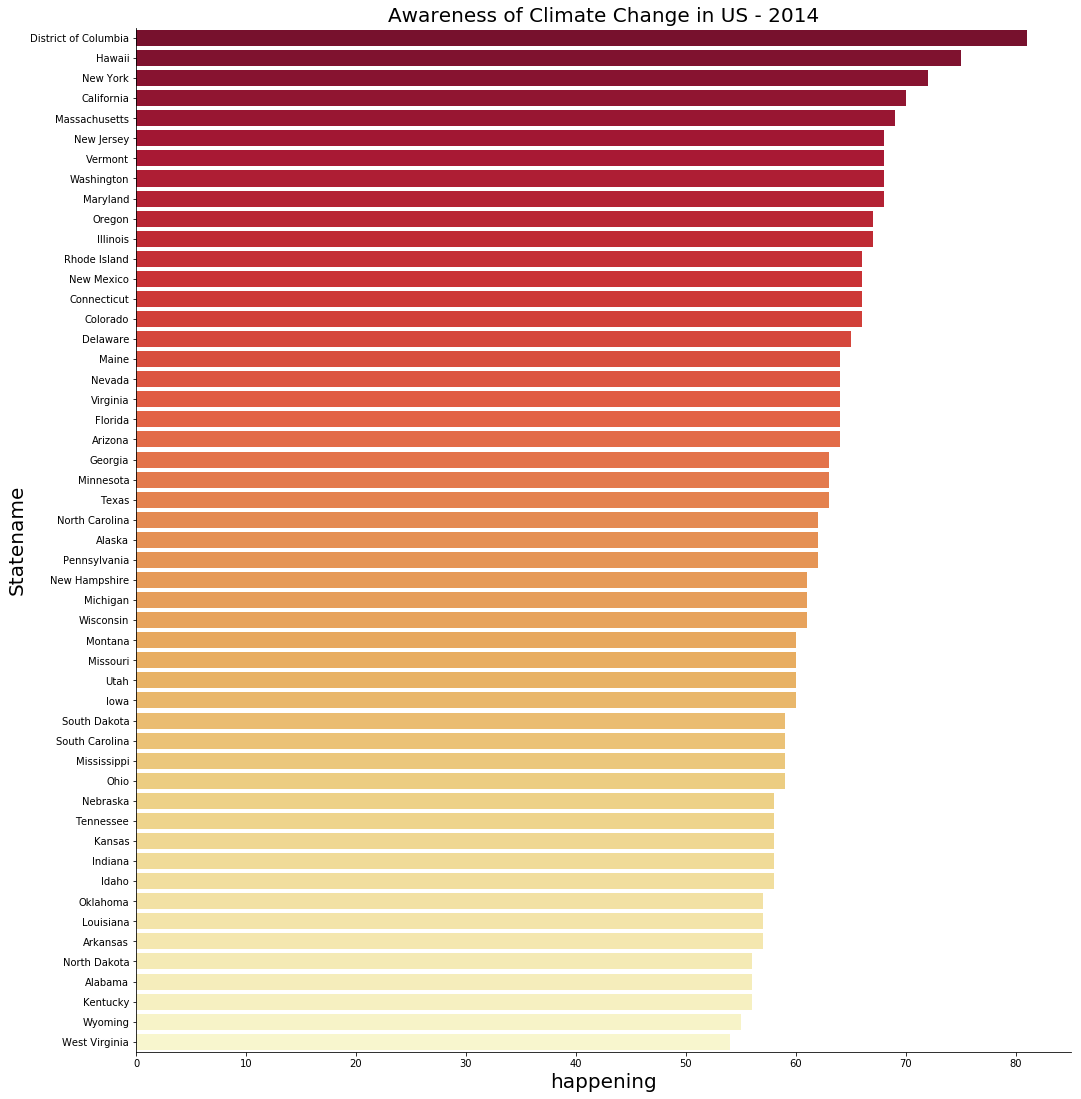

In [5]:
#plot awareness states
sc = sns.color_palette("YlOrRd", 51)
sc.reverse()
sns.catplot(x = 'happening', y = 'Statename', kind = 'bar', palette = sc, data = sort_state_2014, height = 15)
plt.xlabel('happening', size = 20)
plt.ylabel('Statename', size = 20)
plt.title('Awareness of Climate Change in US - 2014', size = 20)

In [6]:
#store top 10 awareness states
top10_aware_2014 = sort_state_2014.head(10)
print(top10_aware_2014)

               Statename  happening
7   District of Columbia         81
11                Hawaii         75
34              New York         72
4             California         70
19         Massachusetts         69
31            New Jersey         68
46               Vermont         68
47            Washington         68
20              Maryland         68
37                Oregon         67


In [7]:
#store last 10 awareness states
last10_aware_2014 = sort_state_2014.tail(10)
print(last10_aware_2014)

        Statename  happening
15        Indiana         58
13          Idaho         58
36       Oklahoma         57
18      Louisiana         57
2        Arkansas         57
28   North Dakota         56
1         Alabama         56
17       Kentucky         56
50        Wyoming         55
49  West Virginia         54


# Data Cleaning - Awareness by States - 2016

In [8]:
#import awareness by state 2016
awareness_2016 = pd.read_csv('Datasets/YCOM_2016.csv')
#print(awareness_2016.columns)
#print(awareness_2016)

In [9]:
#extract rows that are 'states' type
state_2016 = awareness_2016[awareness_2016['GeoType'].str.match('State')]
#print(awareness_2016.columns)
#print(state_2016)

In [10]:
#store GeoName and happening data only
state_2016 = state_2016[['GeoName', 'happening']]
#print(awareness_2016.columns)
#print(new_state_2016)

We need both the same top10 and last10 awareness states in 2014 from the dataset 2016 in order to compare

In [11]:
#extract top10 awareness states in 2014 from the dataset 2016
sametopstate_2016 = pd.DataFrame([])
for index, rows in state_2016.iterrows():
    name = rows['GeoName']
    happen = rows['happening']
    for n in top10_aware_2014['Statename']:
        if name == n:
            sametopstate_2016 = sametopstate_2016.append({'GeoName' : name, 'happening' : happen}, ignore_index = True)
            
#print(sametopstate_2016)

In [12]:
#sort the dataset in descending order
sort_topstate_2016 = sametopstate_2016.sort_values(by = ['happening'], ascending = False)
print(sort_topstate_2016)

                GeoName  happening
1  District of Columbia     84.364
2                Hawaii     78.490
6              New York     77.018
0            California     75.241
3              Maryland     75.139
5            New Jersey     75.110
4         Massachusetts     73.947
8               Vermont     72.692
9            Washington     72.632
7                Oregon     72.137


In [13]:
#extract last10 awareness states in 2014 from the dataset 2016
samelaststate_2016 = pd.DataFrame([])
for index, rows in state_2016.iterrows():
    name = rows['GeoName']
    happen = rows['happening']
    for n in last10_aware_2014['Statename']:
        if name == n:
            samelaststate_2016 = samelaststate_2016.append({'GeoName' : name, 'happening' : happen}, ignore_index = True)
            
#print(samelaststate_2016)

In [14]:
#sort the dataset in descending order
sort_laststate_2016 = samelaststate_2016.sort_values(by = ['happening'], ascending = False)
print(sort_laststate_2016)

         GeoName  happening
5      Louisiana     65.452
2          Idaho     64.889
3        Indiana     64.138
1       Arkansas     64.120
0        Alabama     63.450
7       Oklahoma     63.127
4       Kentucky     62.392
6   North Dakota     62.190
9        Wyoming     60.921
8  West Virginia     60.476


# Haven't done yet (Might not need this)

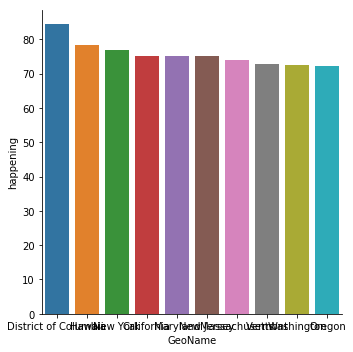

In [15]:
#plot the top 10 awareness states
sns.catplot(x = 'GeoName', y = 'happening', kind = 'bar', data = sort_topstate_2016)

# Data Cleaning - Carbon dioxide emission by state – US only (2005-2016)

In [16]:
#import data
carbon_dioxide_emission = pd.read_excel('Datasets/Carbon_dioxide_emission_by_state.xlsx')

In [17]:
#Rename columns and clean the dataset
carbon_dioxide_emission.rename(columns = {'Table 2. State energy-related carbon dioxide emissions by year, adjusted (2005─2016)' : 'State'},
                              inplace = True) 
cde = carbon_dioxide_emission.ix[4:45]
cde = cde.drop(['Unnamed: 13', 'Unnamed: 14'], axis = 1)
cde.rename(columns = {'Unnamed: 1' : '2005',
                   'Unnamed: 2' : '2006',
                   'Unnamed: 3' : '2007',
                   'Unnamed: 4' : '2008',
                   'Unnamed: 5' : '2009',
                   'Unnamed: 6' : '2010',
                   'Unnamed: 7' : '2011',
                   'Unnamed: 8' : '2012',
                   'Unnamed: 9' : '2013',
                   'Unnamed: 10' : '2014',
                   'Unnamed: 11' : '2015',
                   'Unnamed: 12' : '2016'}, inplace = True)
print(cde)



                   State        2005        2006        2007        2008  \
4                Alabama  145.717386  148.040103  149.574946  141.803359   
5                 Alaska   49.017593   46.644660   44.870695   40.253261   
6                Arizona   98.289736  101.468835  103.357057  103.841365   
7               Arkansas   61.080761   62.918003   64.213320   65.141909   
8             California  390.133567  398.302410  403.127766  387.428138   
9               Colorado   96.795597   97.700271  100.254100   98.388137   
10           Connecticut   44.806009   41.662092   40.835317   38.253591   
11              Delaware   17.056965   15.971158   16.783208   15.862116   
12  District of Columbia    3.984124    3.229448    3.425608    3.130070   
13               Florida  264.996379  263.157296  260.578250  242.271887   
14               Georgia  187.410094  184.642255  187.141716  174.538665   
15                Hawaii   23.302532   23.545096   24.344604   19.561525   
16          

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


# - Extract head(10) and tail(10) states emission data

# - Plot diagram - x axis(GeoName) sub x-axis(2014/2016awareness and emission)
# - Plot diagram - y axis(2014/2016 awareness and emission)

# - Predict 2018 emission based on previous data - linear regression

# Data Cleaning - Annual greenhouse gas data – US only (1990-2017)

In [18]:
#import greenhouse gas data
annual_gas_us = pd.read_csv('Datasets/GreenhouseGasInventoryDataUS.csv')
#print(annual_gas_us)

In [19]:
#Transpose dataset and reset/rename index
annual_gas_us = annual_gas_us.set_index('Gas').rename_axis(['Year']).transpose().reset_index()
annual_gas_us.rename(columns = {'index' : 'Year'}, inplace = True)
#print(annual_gas_us)

# Data Analysis 

Text(0.5, 1.0, 'Annual Greenhouse Gas in US - 1990 to 2017')

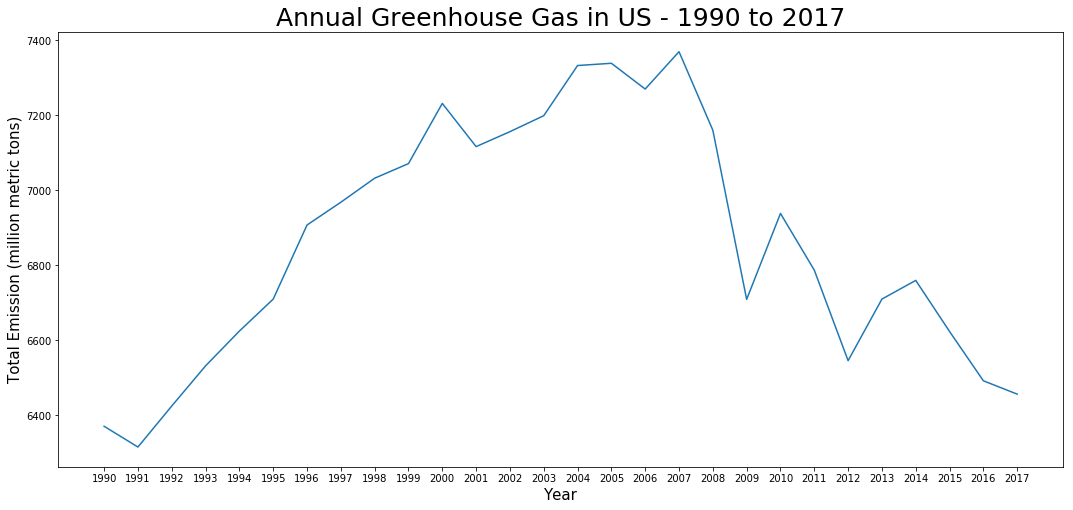

In [20]:
#Plot the diagram to show annual greenhouse gas in US over the year
f = plt.figure(figsize = (18,8))
ax = f.add_subplot(1,1,1)
ax.plot(annual_gas_us['Year'], annual_gas_us['Total'])
ax.set_xlabel('Year', size = 15)
ax.set_ylabel('Total Emission (million metric tons)', size = 15)
ax.set_title('Annual Greenhouse Gas in US - 1990 to 2017', size = 25)

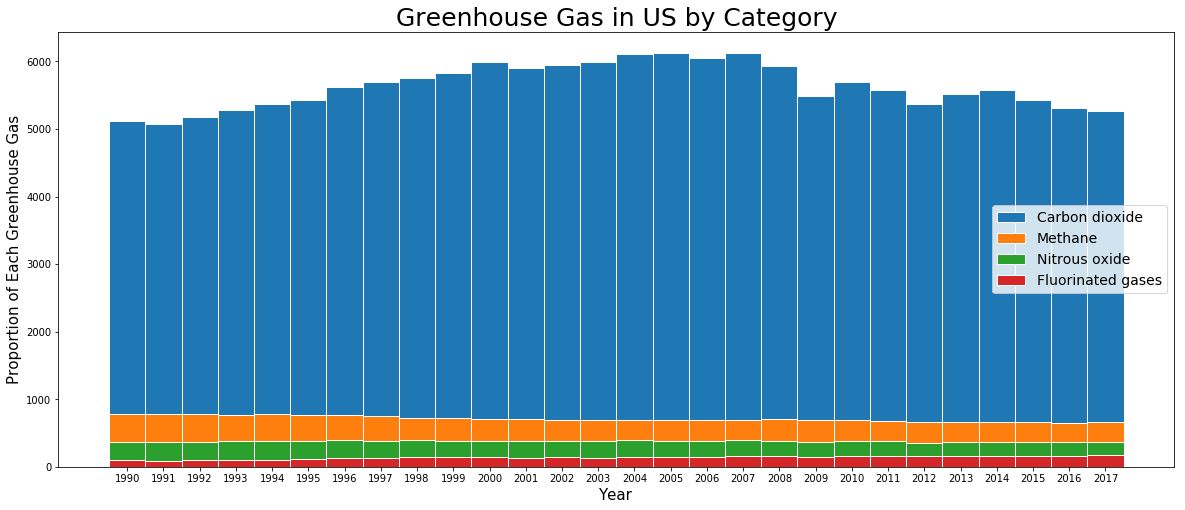

In [21]:
#Generate barplot to show emission in US over year by category
f = plt.figure(figsize = (20,8))
ax = f.add_subplot(1,1,1)
bars = max(annual_gas_us['Total'])
r = annual_gas_us['Year']
barWidth = 1

plt.bar(r, annual_gas_us['Carbon dioxide'], edgecolor = 'white', width = barWidth, label = 'Carbon dioxide')
plt.bar(r, annual_gas_us['Methane'], edgecolor = 'white', width = barWidth, label = 'Methane')
plt.bar(r, annual_gas_us['Nitrous oxide'], edgecolor = 'white', width = barWidth, label = 'Nitrous oxide')
plt.bar(r, annual_gas_us['Fluorinated gases'], edgecolor = 'white', width = barWidth, label = 'Fluorinated gases')

plt.xlabel('Year', size = 15)
plt.ylabel('Proportion of Each Greenhouse Gas', size = 15)
plt.title('Greenhouse Gas in US by Category', size = 25)
plt.legend(loc = 5, prop = {'size': 14})
